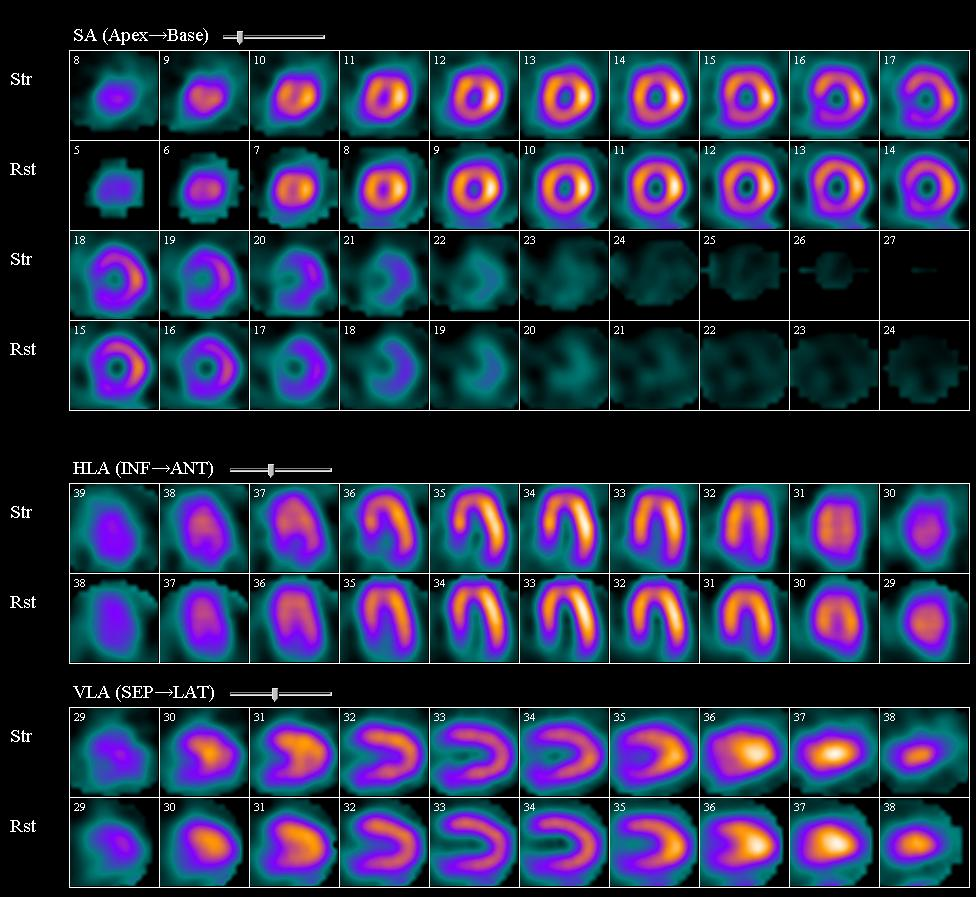

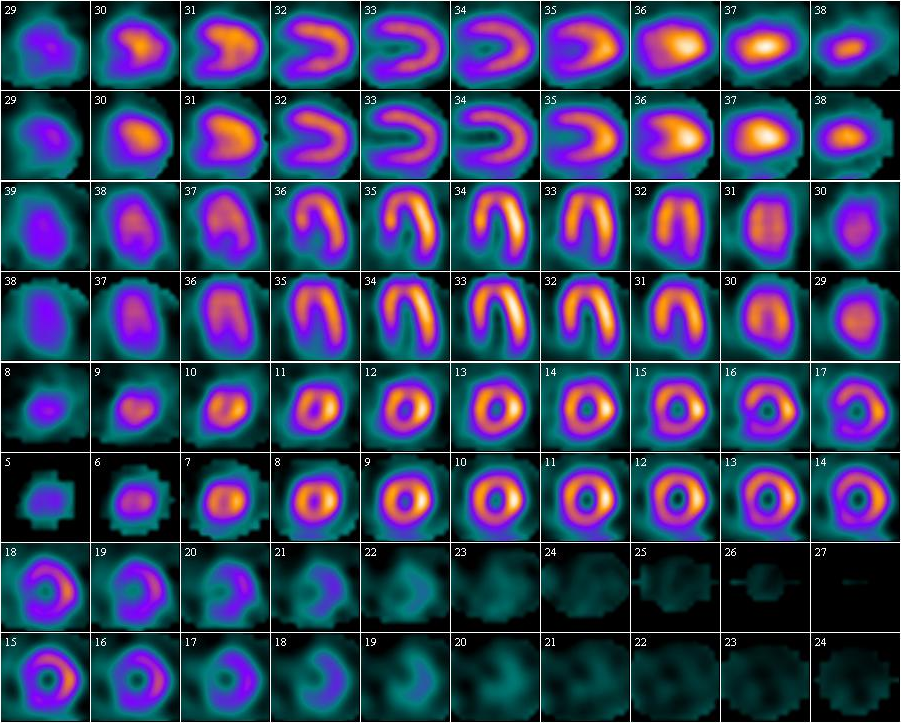

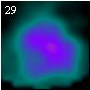

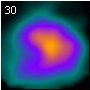

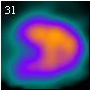

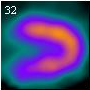

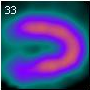

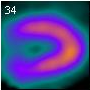

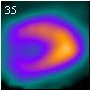

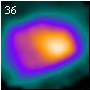

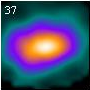

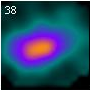

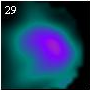

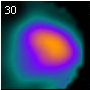

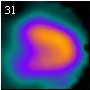

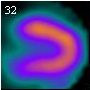

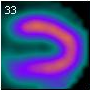

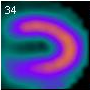

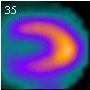

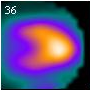

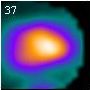

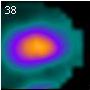

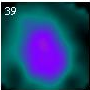

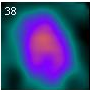

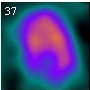

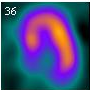

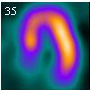

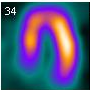

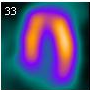

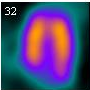

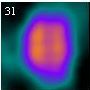

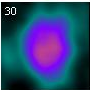

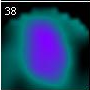

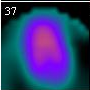

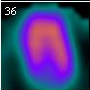

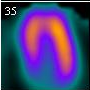

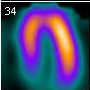

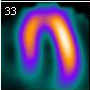

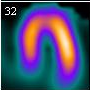

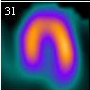

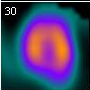

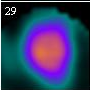

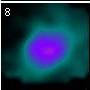

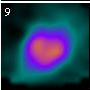

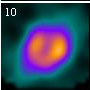

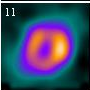

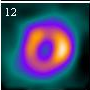

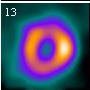

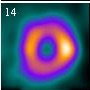

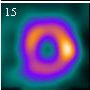

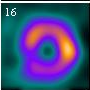

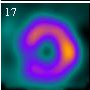

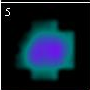

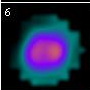

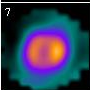

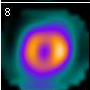

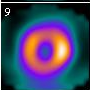

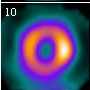

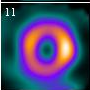

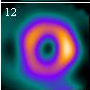

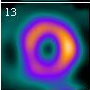

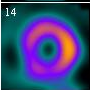

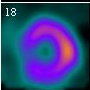

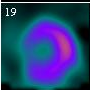

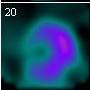

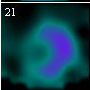

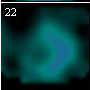

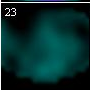

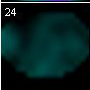

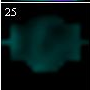

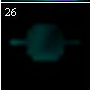

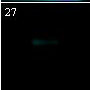

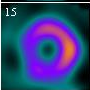

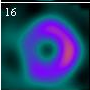

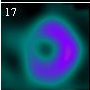

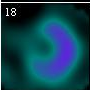

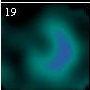

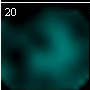

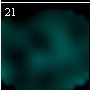

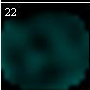

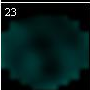

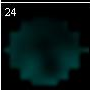

'/content/small_images1.zip'

In [14]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import shutil

# Directory path where your input image is stored
normal_dir = '/content/img'

# Path to the input image within the specified directory
input_image_path = os.path.join(normal_dir, '2001.jpg')

# Load the input image
image = cv2.imread(input_image_path)

# Create an empty canvas to combine the main images
combined_image = None

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to isolate the white boxes
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store the main images
main_images = []

# Find the maximum width and height among main images
max_width = 0
total_height = 0

# Iterate through the detected contours (white boxes)
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)

    # Filter out smaller boxes that may contain noise
    if w > 50 and h > 50:
        # Crop the individual white box (main image)
        white_box = image[y:y+h, x:x+w]
        main_images.append(white_box)
        max_width = max(max_width, w)
        total_height += h

# Create an empty canvas for the combined image
combined_image = np.zeros((total_height, max_width, 3), dtype=np.uint8)

# Initialize the vertical position for stacking
y_offset = 0

# Iterate through the main images and stack them vertically on the combined image
for main_image in main_images:
    h, w, _ = main_image.shape
    combined_image[y_offset:y_offset + h, :w] = main_image
    y_offset += h

# Display the input image
cv2_imshow(image)

# Display the combined image from the first code
cv2_imshow(combined_image)

# Now, proceed to extract and display the smaller images

# Determine the size of each small image
small_image_height = combined_image.shape[0] // 8
small_image_width = combined_image.shape[1] // 10

# Create a list to store the extracted small images
small_images = []

# Iterate through the rows and columns to crop the small images
for row in range(8):
    for col in range(10):
        y1 = row * small_image_height
        y2 = (row + 1) * small_image_height
        x1 = col * small_image_width
        x2 = (col + 1) * small_image_width

        small_image = combined_image[y1:y2, x1:x2]
        small_images.append(small_image)

# Display the 80 extracted small images
for i, small_image in enumerate(small_images):
    cv2_imshow(small_image)

# Save the extracted small images to the output directory
output_dir = '/content/extracted_images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the extracted small images
for i, small_image in enumerate(small_images):
    output_filename = os.path.join(output_dir, f'small_image_{i}.png')
    cv2.imwrite(output_filename, small_image)

# Create a ZIP file containing the small images
shutil.make_archive('/content/small_images1', 'zip', output_dir)